In [29]:
%config IPCompleter.greedy=True

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
import pandas as pd

For this model I chose to work with data taken from the 1970's British Boarding School influenza case.

In [31]:
#total population 
N = 738
#Initial number of infected: 
I0 = 3
#Number of initial recovered: 
R0 = 0
#The number of susceptible: 
S0 = N - I0 - R0

#Perameters that will eventually turn into dynamic vars, possibly some sort of optimization type dealio  
beta = .002342
gamma = 0.476



In [38]:
#read in Flu dataset
Flu_Data = pd.read_csv ("C:/Users/antob/OneDrive - Broward College/_FSU_/5 - SPRING 2020/UROP/Project/BoardingSchool.csv" , index_col = 0)
Flu_Data["T"] = np.arange(len(Flu_Data))
Flu_Data = np.array(Flu_Data)
#Number of days
t = Flu_Data[:,2]


The following is the System of ODE equations,the SIR model. 

In [33]:

def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = (-beta * S * I)
    dIdt = (beta * S * I) - gamma * I
    dRdt = (gamma*I)
    return dSdt, dIdt, dRdt

This is where python solves the equation and feeds it to the three compartments: S, I, R

In [ ]:

#Initial condition vector: 
Y0 = S0, I0, R0

sol = odeint(SIR, Y0, t, args = (N, beta, gamma))
S, I, R = sol.T
#print (sol.T)

In [35]:
%matplotlib inline

Plotting the results of the SIR. 

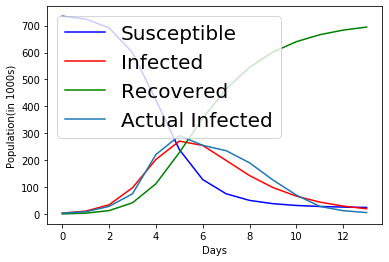

In [36]:
plt.plot (Flu_Data[:,2], S, c= "b", label = 'Susceptible')
plt.plot (Flu_Data[:,2], I, c="r", label = 'Infected')
plt.plot (Flu_Data[:,2], R, c="g",label = 'Recovered')


plt.plot (Flu_Data[:,2], Flu_Data[:,0], label = "Actual Infected")

plt.ylabel("Population(in 1000s)") 
plt.xlabel ('Days')
plt.legend(prop={"size":20})
plt.show()  

                        